In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import numpy, pandas, matpltlib.pyplot, sklearn modules and seaborn
import numpy as np
import pandas as pd
import joblib
import re
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Import LightGBM Classifier
import lightgbm as lgbm
# Import XGBoost Classifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [3]:
# Import the data
df = pd.read_csv('Data_cleaned_version.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6900865 entries, 0 to 6900864
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   ADDR_PCT_CD       float64
 2   OFNS_DESC         object 
 3   CRM_ATPT_CPTD_CD  object 
 4   LAW_CAT_CD        object 
 5   BORO_NM           object 
 6   PREM_TYP_DESC     object 
 7   Latitude          float64
 8   Longitude         float64
 9   VIC_AGE_GROUP     object 
 10  VIC_RACE          object 
 11  VIC_SEX           object 
 12  year              int64  
 13  month             int64  
 14  day               int64  
 15  hour              int64  
 16  weekday           object 
dtypes: float64(3), int64(5), object(9)
memory usage: 895.0+ MB
None


In [4]:
del df['Unnamed: 0']

In [ ]:
df

,ADDR_PCT_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,day,hour,weekday
0,81.0,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,BROOKLYN,STREET,40.685041,-73.921777,25-44,WHITE,F,2014,9,4,17,Thursday
1,121.0,GRAND LARCENY,COMPLETED,FELONY,STATEN ISLAND,STREET,40.636991,-74.134093,45-64,WHITE HISPANIC,F,2016,10,12,7,Wednesday
2,41.0,GRAND LARCENY,COMPLETED,FELONY,BRONX,STREET,40.823876,-73.891863,45-64,WHITE HISPANIC,F,2012,9,28,13,Friday
3,46.0,PETIT LARCENY,COMPLETED,MISDEMEANOR,BRONX,STREET,40.845707,-73.910398,<18,WHITE HISPANIC,F,2015,3,24,15,Tuesday
4,109.0,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,QUEENS,STREET,40.763992,-73.828426,25-44,BLACK,M,2017,5,20,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6900860,61.0,GRAND LARCENY,COMPLETED,FELONY,BROOKLYN,RESIDENCE - APT. HOUSE,40.583360,-73.951446,25-44,WHITE,F,2013,3,13,12,Wednesday
6900861,28.0,PETIT LARCENY,COMPLETED,MISDEMEANOR,MANHATTAN,COMMERCIAL BUILDING,40.808374,-73.946886,UNKNOWN,UNKNOWN,UNKNOWN,2014,9,12,17,Friday
6900862,70.0,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,BROOKLYN,STREET,40.648648,-73.967731,25-44,BLACK,F,2012,12,20,13,Thursday
6900863,90.0,PETIT LARCENY,COMPLETED,MISDEMEANOR,BROOKLYN,STREET,40.716045,-73.964163,45-64,WHITE,M,2013,4,4,13,Thursday


In [5]:
# Count the number of row in each category
df.LAW_CAT_CD.value_counts().sort_values(ascending=False)

MISDEMEANOR    3887974
FELONY         2124197
VIOLATION       888694
Name: LAW_CAT_CD, dtype: int64

In [6]:
df.LAW_CAT_CD = df['LAW_CAT_CD'].replace(['FELONY','MISDEMEANOR',"VIOLATION"],[2,1,0])

In [7]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].replace(['RESIDENCE - APT. HOUSE'], 'Residence_House')

In [8]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].replace(['RESIDENCE - PUBLIC HOUSING'], 'Residence_House')

In [9]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].replace(['RESIDENCE-HOUSE'], 'Residence_House')

In [10]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].replace(['PARK/PLAYGROUND'], 'Park_Street')

In [11]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].replace(['STREET'], 'Park_Street')

In [12]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].replace(['RESTAURANT/DINER'], 'COMMERCIAL BUILDING')

In [13]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].replace(['BAR/NIGHT CLUB'], 'COMMERCIAL BUILDING')

In [14]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].replace(['FAST FOOD'], 'COMMERCIAL BUILDING')

In [15]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].replace(['CHAIN STORE'], 'COMMERCIAL BUILDING')

In [16]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].replace(['DEPARTMENT STORE'], 'COMMERCIAL BUILDING')

In [17]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].replace(['GROCERY/BODEGA'], 'COMMERCIAL BUILDING')

In [18]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].replace(['PUBLIC BUILDING'], 'COMMERCIAL BUILDING')

In [19]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].replace(['CLOTHING/BOUTIQUE'], 'COMMERCIAL BUILDING')

In [20]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].replace(['DRUG STORE'], 'COMMERCIAL BUILDING')

In [21]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].replace(['FOOD SUPERMARKET'], 'COMMERCIAL BUILDING')

In [22]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].replace(['SMALL MERCHANT'], 'COMMERCIAL BUILDING')

In [23]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].replace(['STORE UNCLASSIFIED'], 'COMMERCIAL BUILDING')

In [24]:
temp_prem = df['PREM_TYP_DESC'].value_counts().head(3).reset_index()
temp_prem

,index,PREM_TYP_DESC
0,Residence_House,2667002
1,Park_Street,2299576
2,COMMERCIAL BUILDING,1009087


In [ ]:
df['PREM_TYP_DESC'].unique()

array(['Park_Street', 'COMMERCIAL BUILDING', 'Residence_House', 'BANK',
       'TRANSIT - NYC SUBWAY', 'SOCIAL CLUB/POLICY',
       'TAXI (YELLOW LICENSED)', 'HOSPITAL',
       'PARKING LOT/GARAGE (PRIVATE)', 'OTHER', 'GAS STATION',
       'PARKING LOT/GARAGE (PUBLIC)', 'CANDY STORE', 'LIQUOR STORE',
       'HOTEL/MOTEL', 'ATM', 'PUBLIC SCHOOL', 'BUS (NYC TRANSIT)',
       'JEWELRY', 'HIGHWAY/PARKWAY', 'BOOK/CARD', 'VIDEO STORE',
       'DOCTOR/DENTIST OFFICE', 'GYM/FITNESS FACILITY',
       'CONSTRUCTION SITE', 'CHECK CASHING BUSINESS', 'VARIETY STORE',
       'PRIVATE/PAROCHIAL SCHOOL', 'BEAUTY & NAIL SALON', 'CHURCH',
       'STORAGE FACILITY', 'SHOE', 'TELECOMM. STORE', 'AIRPORT TERMINAL',
       'BRIDGE', 'BUS STOP', 'DRY CLEANER/LAUNDRY', 'TUNNEL',
       'TAXI (LIVERY LICENSED)', 'SYNAGOGUE', 'OPEN AREAS (OPEN LOTS)',
       'BUS TERMINAL', 'MOSQUE', 'FACTORY/WAREHOUSE', 'MARINA/PIER',
       'PHOTO/COPY', 'ABANDONED BUILDING', 'TRANSIT FACILITY (OTHER)',
       'BUS (OTHER)', '

In [25]:
df = df.loc[df['PREM_TYP_DESC'].isin(temp_prem['index'])]

In [26]:
# Define a utility function to reduce memory usage by convert the values types
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df
df = reduce_mem_usage(df)

<ipython-input-26-175808f8c788>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.float16)
<ipython-input-26-175808f8c788>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(np.int8)


Memory usage after optimization is: 478.70 MB
Decreased by 38.2%


In [27]:
len(df)

5975665

In [28]:
# Set the list of features to include in Machine Learning Model
feature_lst= ['ADDR_PCT_CD', 'month', 'day', 'hour','Latitude',
       'Longitude', 'BORO_NM',"weekday", 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX','LAW_CAT_CD','PREM_TYP_DESC']

df_sel=df[feature_lst].copy()
df_sel.info()
df_sel.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975665 entries, 0 to 6900864
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ADDR_PCT_CD    float16
 1   month          int8   
 2   day            int8   
 3   hour           int8   
 4   Latitude       float16
 5   Longitude      float16
 6   BORO_NM        object 
 7   weekday        object 
 8   VIC_AGE_GROUP  object 
 9   VIC_RACE       object 
 10  VIC_SEX        object 
 11  LAW_CAT_CD     int8   
 12  PREM_TYP_DESC  object 
dtypes: float16(3), int8(4), object(6)
memory usage: 376.1+ MB


,ADDR_PCT_CD,month,day,hour,Latitude,Longitude,BORO_NM,weekday,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,LAW_CAT_CD,PREM_TYP_DESC
0,81.0,9,4,17,40.68750,-73.9375,BROOKLYN,Thursday,25-44,WHITE,F,1,Park_Street
1,121.0,10,12,7,40.62500,-74.1250,STATEN ISLAND,Wednesday,45-64,WHITE HISPANIC,F,2,Park_Street
2,41.0,9,28,13,40.81250,-73.8750,BRONX,Friday,45-64,WHITE HISPANIC,F,2,Park_Street
3,46.0,3,24,15,40.84375,-73.9375,BRONX,Tuesday,<18,WHITE HISPANIC,F,1,Park_Street
4,109.0,5,20,4,40.75000,-73.8125,QUEENS,Saturday,25-44,BLACK,M,1,Park_Street


In [29]:
df_sel['PREM_TYP_DESC'].unique()

array(['Park_Street', 'COMMERCIAL BUILDING', 'Residence_House'],
      dtype=object)

In [30]:
print(df_sel.shape)
# double check that the data is balanced
df_sel.LAW_CAT_CD.value_counts().sort_values(ascending=False)

(5975665, 13)


1    3387595
2    1809451
0     778619
Name: LAW_CAT_CD, dtype: int64

In [31]:
df_sel.columns

Index(['ADDR_PCT_CD', 'month', 'day', 'hour', 'Latitude', 'Longitude',
       'BORO_NM', 'weekday', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX',
       'LAW_CAT_CD', 'PREM_TYP_DESC'],
      dtype='object')

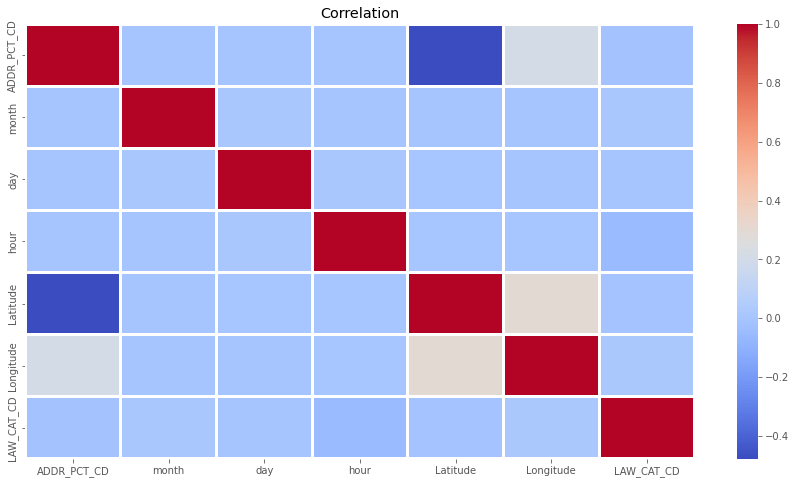

In [32]:
# Draw a corrolation matrix of the variables
corr = df_sel.corr()

plt.figure(figsize = (15,8))
sns.heatmap(corr, cmap = "coolwarm", linewidth = 2, linecolor = "white")
plt.title("Correlation")
plt.show()

In [33]:
# Generate dummies for categorical data
df_state_dummy = pd.get_dummies(df_sel)
df_state_dummy.columns = df_state_dummy.columns.str.replace('VIC_AGE_GROUP_<18', 'VIC_AGE_GROUP_18')
df_state_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975665 entries, 0 to 6900864
Data columns (total 40 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   ADDR_PCT_CD                              float16
 1   month                                    int8   
 2   day                                      int8   
 3   hour                                     int8   
 4   Latitude                                 float16
 5   Longitude                                float16
 6   LAW_CAT_CD                               int8   
 7   BORO_NM_BRONX                            uint8  
 8   BORO_NM_BROOKLYN                         uint8  
 9   BORO_NM_MANHATTAN                        uint8  
 10  BORO_NM_QUEENS                           uint8  
 11  BORO_NM_STATEN ISLAND                    uint8  
 12  BORO_NM_UNKNOWN                          uint8  
 13  weekday_Friday                           uint8  
 14  weekday_Monday    

In [34]:
# Assign the data
df=df_state_dummy

# Set the target for the prediction
target='LAW_CAT_CD'

# Create arrays for the features and the response variable

# set X and y
y = df[target]
X = df.drop(target, axis=1)

In [35]:
y.unique()
y.value_counts()

1    3387595
2    1809451
0     778619
Name: LAW_CAT_CD, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=21, stratify=y)

lightgbm

In [59]:
# build the lightgbm model
import lightgbm as lgb
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.5794


In [ ]:
clf.booster_.save_model('LightGBM.txt')
#Toload
#bst = lgb.Booster(model_file='mode.txt')

In [37]:
import lightgbm as lgb
bst = lgb.Booster(model_file='LightGBM.txt')

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
y_pred=bst.predict(X_test)

Random forest

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=30, # Number of trees
                                  min_samples_split = 20,
                                  bootstrap = True, 
                                  max_depth = 36, 
                                  min_samples_leaf = 25)

#Train the model using the training sets
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

# Get the accuracy score
acc_rf = accuracy_score(y_test, y_pred)

# Get classification report
class_report = classification_report(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[Random forest algorithm] accuracy_score: {:.3f}.".format(acc_rf))

[Random forest algorithm] accuracy_score: 0.581.


In [ ]:
import joblib

# save
joblib.dump(clf, "random_forest.joblib")
# load, no need to initialize the loaded_rf
#loaded_rf = joblib.load("/content/drive/MyDrive/Data_Tebourbi/random_forest.joblib")

['/content/drive/MyDrive/Data_Tebourbi/random_forest.joblib']

In [54]:
import joblib
loaded_rf = joblib.load("random_forest.joblib")

In [55]:
y_pred=loaded_rf.predict(X_test)

In [ ]:
# Get the accuracy score
acc_rf = accuracy_score(y_test, y_pred)

# Get classification report
class_report = classification_report(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[Random forest algorithm] accuracy_score: {:.3f}.".format(acc_rf))
print(class_report)

[Random forest algorithm] accuracy_score: 0.581.
              precision    recall  f1-score   support

           0       0.39      0.00      0.00    155724
           1       0.59      0.93      0.72    677519
           2       0.52      0.17      0.26    361890

    accuracy                           0.58   1195133
   macro avg       0.50      0.37      0.33   1195133
weighted avg       0.54      0.58      0.49   1195133



Decesion Tree_Gini

In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=12, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.5778


In [ ]:
import joblib

# save
joblib.dump(clf_gini, "decesion_tree_gini.joblib")

['/content/drive/MyDrive/Data_Tebourbi/decesion_tree_gini.joblib']

In [ ]:
loaded_dc = joblib.load("decesion_tree_gini.joblib")
y_pred=loaded_dc.predict(X_test)
# Get the accuracy score
acc_rf = accuracy_score(y_test, y_pred)

# Get classification report
class_report = classification_report(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[Random forest algorithm] accuracy_score: {:.3f}.".format(acc_rf))
print(class_report)

[Random forest algorithm] accuracy_score: 0.578.
              precision    recall  f1-score   support

           0       0.33      0.00      0.01    155724
           1       0.59      0.93      0.72    677519
           2       0.51      0.16      0.25    361890

    accuracy                           0.58   1195133
   macro avg       0.47      0.37      0.32   1195133
weighted avg       0.53      0.58      0.48   1195133



In [ ]:
y_pred[0]

1

Decesion Tree_Entropy

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=13, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)
y_pred_entropy = clf_en.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_entropy)))

Model accuracy score with criterion entropy index: 0.5780


In [ ]:
import joblib

# save
joblib.dump(clf_gini, "decesion_tree_entropy.joblib")

['/content/drive/MyDrive/Data_Tebourbi/decesion_tree_entropy.joblib']

In [ ]:
loaded_dc = joblib.load("decesion_tree_gini.joblib")
y_pred=loaded_dc.predict(X_test)
# Get the accuracy score
acc_rf = accuracy_score(y_test, y_pred)

# Get classification report
class_report = classification_report(y_test, y_pred)

# Model Accuracy, how often is the classifier correct?
print("[Random forest algorithm] accuracy_score: {:.3f}.".format(acc_rf))
print(class_report)

XGBOOST

In [ ]:
X_train.columns = X_train.columns.str.replace('VIC_AGE_GROUP_<18', 'VIC_AGE_GROUP_18')

In [ ]:
X_test.columns = X_test.columns.str.replace('VIC_AGE_GROUP_<18', 'VIC_AGE_GROUP_18')

In [ ]:
from xgboost import XGBClassifier
# Define the model hyperparameters
params = {
            'objective':'multi:softmax',
            'max_depth': 25,
            'alpha': 10,
            'learning_rate': 0.1,
            'n_estimators':25,
            'use_label_encoder':False
        }

# instantiate the classifier 
#xgb = XGBClassifier(**params)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[22:04:59] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(objective='multi:softprob')

In [ ]:
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

In [ ]:
# save
joblib.dump(clf_gini, "XGBOOST.joblib")